In [1]:
import numpy as np
import scipy as sc
import scipy.constants as cn
import matplotlib.pyplot as plt

from qutip import *

In [2]:
wq = 5.0; wr = 6.5; wd = 6.5; #GHz


D = abs(wq-wr)
Dr = wr-wd; 
g = 70*1e-3; # GHz
chi = g**2/(2*np.pi*D);

kappa1 = 8*1e-3; #GHz;
gamma1 = 0.2*1e-3; #GHz
gammap = 5*1e-3;

dimq = 2; dimr = 3;
psi0 = tensor(basis(dimq, 0), basis(dimr, 0))
alpha = 5#*(np.exp())/()
psic = tensor(basis(dimq, 0), coherent(dimr, alpha))

a = tensor(qeye(dimq), destroy(dimr)); adg= a.dag();
sm = tensor(sigmam(), qeye(dimr)); sz = tensor(sigmaz(), qeye(dimr))

def f(t):
    return 0.1*np.sin(t)

In [3]:
(wq-wr)**2/(4*g**2)

114.79591836734693

In [4]:
t = np.linspace(0, 2000, 2001)

Ht = [cn.hbar/2 *(wq + chi)* sz + cn.hbar*Dr * adg*a + cn.hbar*chi * adg*a*sz,  [a+adg, f(t)]]
c_ops = [np.sqrt(kappa1)*a, np.sqrt(gamma1)*sm, np.sqrt(gammap/2)*sz]

In [5]:
result = mesolve(Ht, psi0, t, c_ops, [a.dag()*a], options=Options(rhs_with_state=True, store_states=True))
states = result.states

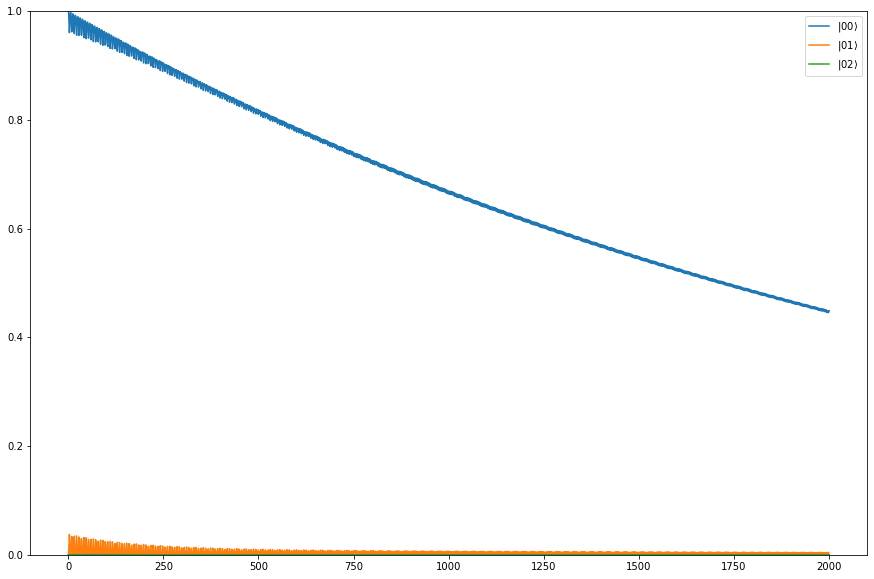

In [7]:
b00 = tensor(basis(dimq, 0), basis(dimr, 0))
b01 = tensor(basis(dimq, 0), basis(dimr, 1))
b02 = tensor(basis(dimq, 0), basis(dimr, 2))
b10 = tensor(basis(dimq, 1), basis(dimr, 0))
b11 = tensor(basis(dimq, 1), basis(dimr, 1))
b12 = tensor(basis(dimq, 1), basis(dimr, 2))


data_prob = []
basis_set = [b00, b01, b02, b10, b11, b12]
basis_name = ['00', '01', '02', '10', '11', '12']
psimea = [b00, b01, b02]#b00, b01, b02, b10, b11, b12]
psimea_name = [basis_name[index] for index in [basis_set.index(psi) for psi in psimea]]
psimea_name_latex = [r'$\left|{}\right>$'.format(name) for name in psimea_name]

plt.figure(figsize=(15, 10))
plt.ylim(0, 1)
for i, psii in enumerate(psimea):
    probampi_seq = psii.dag()*states
    probi_seq = [probamp.norm()**2 for probamp in probampi_seq]
    
    plt.plot(t, probi_seq, label=psimea_name_latex[i])
    plt.legend()
    data_prob.append(probi_seq)

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

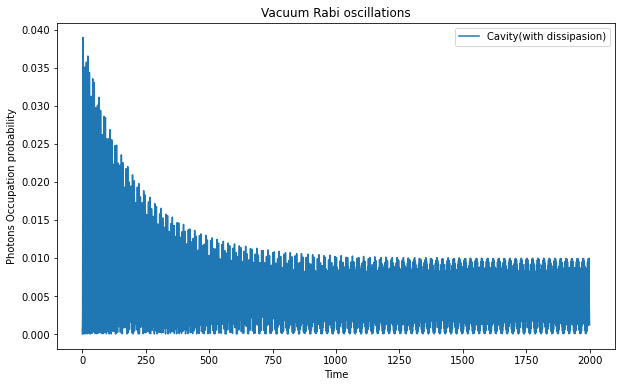

In [85]:
fig, axes = plt.subplots(figsize = (10,6))
n_c = result.expect[0]
axes.plot(t, n_c, label = 'Cavity(with dissipasion)')
axes.legend(loc = 'best')
axes.set_xlabel('Time')
axes.set_ylabel('Photons Occupation probability')
axes.set_title('Vacuum Rabi oscillations')

In [23]:
6679-244**2/(-7.4)/(2*np.pi)

7959.4660394485245